# **Tame Your Python**

Let's see how we can classify emails based on their contents

`Leggo`


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Get the dataset

In [5]:
!wget http://cs.joensuu.fi/sipu/datasets/s1.txt
!ls

--2020-05-29 12:09:36--  http://cs.joensuu.fi/sipu/datasets/s1.txt
Resolving cs.joensuu.fi (cs.joensuu.fi)... 193.167.239.10
Connecting to cs.joensuu.fi (cs.joensuu.fi)|193.167.239.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105000 (103K) [text/plain]
Saving to: ‘s1.txt’

s1.txt              100%[===================>] 102.54K   121KB/s    in 0.8s    

2020-05-29 12:09:38 (121 KB/s) - ‘s1.txt’ saved [105000/105000]

s1.txt	sample_data


In [6]:
!head s1.txt

    664159    550946
    665845    557965
    597173    575538
    618600    551446
    635690    608046
    588100    557588
    582015    546191
    604678    574577
    572029    518313
    604737    574591


In [8]:
X = pd.read_csv('s1.txt', delimiter='    ', header=None)
print(X.shape)

(5000, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [9]:
X.head()
print(X.shape)

(5000, 2)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

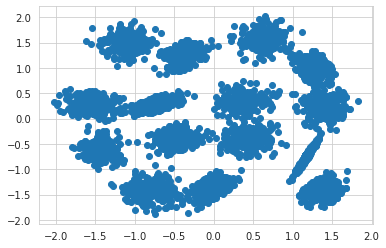

In [11]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.1)

In [0]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(X_train)


In [19]:
clusters = np.unique(y_pred)
print(clusters)

[0 1 2 3 4 5 6 7]


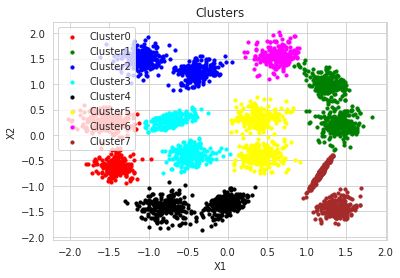

In [20]:
# Visualising the clusters
colors = ['red', 'green', 'blue', 'cyan', 'black', 'yellow', 'magenta', 'brown', 'orange']
for i in np.unique(y_pred):
  plt.scatter(X_train[y_pred == i, 0], X_train[y_pred == i, 1], s = 10, c = colors[i], label = 'Cluster' + str(i))
  #plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 10, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()